In [232]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
#%pip install xgboost
import xgboost as xgb
from sklearn.preprocessing import StandardScaler 

In [223]:
df = pd.read_csv("1.csv", header=None)
#for i in range(2,16):
#    partialDF = pd.read_csv(f"{i}.csv", header=None)
#    df = pd.concat([df,partialDF],ignore_index=True, axis=0)
df.columns = ["index", "accX", "accY", "accZ", "class"]
df.drop("index", axis=1, inplace=True)
df

,accX,accY,accZ,class
0,1502,2215,2153,1
1,1667,2072,2047,1
2,1611,1957,1906,1
3,1601,1939,1831,1
4,1643,1965,1879,1
...,...,...,...,...
162496,1927,2388,2074,7
162497,1930,2383,2074,7
162498,1929,2385,2076,7
162499,1926,2385,2078,7


In [235]:
#https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/
#The general setup for the model is here
y = df['class'].to_numpy()
X = df[['accX', 'accY', 'accZ']].to_numpy()

X = StandardScaler().fit_transform(X)
train_size = 0.8
test_size = 1-train_size
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size = test_size, random_state=42)
print("test\\train splitting complete")
print(f"Training: {len(X_train)}, Testing: {len(X_test)}")

test\train splitting complete
Training: 130000, Testing: 32501


<AxesSubplot:>

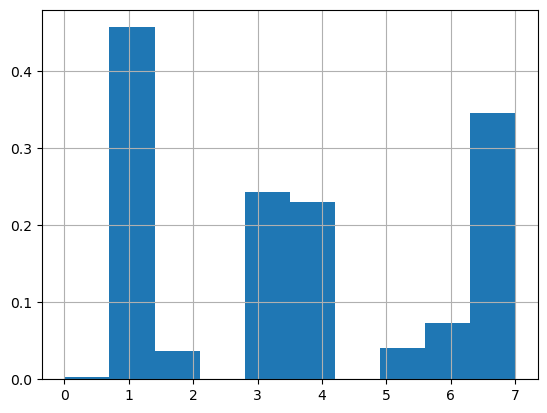

In [219]:
df["class"].hist(density=True)

In [236]:
randomForestClassifier = RandomForestClassifier(n_estimators = 150, criterion="gini", max_features="sqrt", random_state=42)
xgb_clf = xgb.XGBClassifier(n_estimators=150, learning_rate=0.05, max_depth=10, random_state=42)

print("Fitting models")
randomForestClassifier.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)
print("Model fitting complete")


Fitting models
Model fitting complete


In [240]:
#APR Reference: https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case
print("Predicting Model")
y_pred_rf = randomForestClassifier.predict(X_test)
y_pred_xgb = xgb_clf.predict(X_test)
print("Complete")

Predicting Model
Complete


In [241]:
print("Accuracy RF:", accuracy_score(y_test, y_pred_rf))
print("F1 Score RF:", f1_score(y_test, y_pred_rf, average="macro"))
print("Precision RF:", precision_score(y_test, y_pred_rf, average="macro"))
print("Recall RF:", recall_score(y_test, y_pred_rf, average="macro"))
print()
print("Accuracy XGB:", accuracy_score(y_test, y_pred_xgb))
print("F1 Score XGB:", f1_score(y_test, y_pred_xgb, average="macro"))
print("Precision XGB:", precision_score(y_test, y_pred_xgb, average="macro"))
print("Recall XGB:", recall_score(y_test, y_pred_xgb, average="macro"))

Accuracy RF: 0.840374142334082
F1 Score RF: 0.5089192975152921
Precision RF: 0.5622714897095684
Recall RF: 0.4913398236370047

Accuracy XGB: 0.8552044552475309
F1 Score XGB: 0.5271252454487536
Precision XGB: 0.6473770472644603
Recall XGB: 0.4993942066122396
